In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv("lol2021.csv", sep=',')
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,UOL,Boss,GS,Top,Camille,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,L
1,GS,Crazy,UOL,Top,Gwen,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,W
2,UOL,Ahahacik,GS,Jungle,Trundle,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,L
3,GS,Mojito,UOL,Jungle,Talon,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,W
4,UOL,Nomanz,GS,Mid,Leblanc,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,BYG,Maoan,UOL,Mid,Ryze,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,W
216,UOL,Argonavt,BYG,Adc,Senna,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,L
217,BYG,Doggo,UOL,Adc,Draven,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,W
218,UOL,Santas,BYG,Support,Wukong,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,L


In [3]:
labelencoder = LabelEncoder()
for i in range(5):
    df.iloc[:,i] = labelencoder.fit_transform(df.iloc[:,i])
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])

In [4]:
df

,Team,Player,Opponent,Position,Champion,Kills,Deaths,Assists,Creep Score,Gold Earned,Champion Damage Share,Kill Participation,Wards Placed,Wards Destroyed,Ward Interactions,Dragons For,Dragons Against,Barons For,Barons Against,Result
0,9,12,3,4,8,4,5,3,188,11107,0.17,0.78,8,8,16,0,4,0,1,0
1,3,17,9,4,17,3,1,9,217,12201,0.20,0.52,10,7,17,4,0,1,0,1
2,9,2,3,1,57,2,4,5,156,9048,0.15,0.78,8,14,22,0,4,0,1,0
3,3,34,9,1,54,5,4,10,194,11234,0.23,0.65,12,8,20,4,0,1,0,1
4,9,36,3,2,27,1,3,4,216,9245,0.29,0.56,6,9,15,0,4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0,33,9,2,45,4,4,2,356,15558,0.23,0.32,24,6,30,4,1,1,1,1
216,9,6,0,0,47,1,3,9,58,9554,0.16,0.71,35,16,51,1,4,1,1,0
217,0,19,9,0,9,10,2,4,353,20546,0.38,0.74,15,5,20,4,1,1,1,1
218,9,39,0,3,61,0,4,7,200,10354,0.11,0.50,16,8,24,1,4,1,1,0


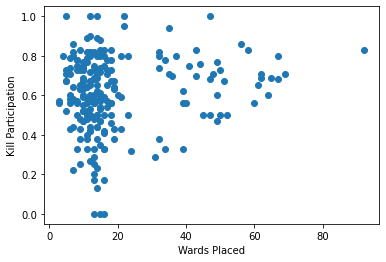

In [5]:
plt.xlabel("Wards Interaction")
plt.ylabel("Kill Participation")
plt.scatter(x=df["Wards Interactions"], y=df["Kill Participation"])

# How team picking affect the match

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:5], df["Result"])

In [14]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [17]:
y_pred = clf.predict(X_test)

<AxesSubplot:>

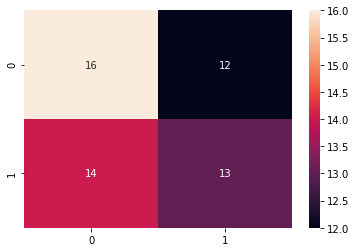

In [19]:
cfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cfm,annot=True)

In [ ]:
accuracy_score(y_true=y_test)